# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 5: High Dimensionality and PCA

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
%%html
<style>
.jp-MarkdownCell {background-color: cornsilk;}
.text_cell {background-color: cornsilk;}
</style>

In [3]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

<div class='theme'> Cancer Classification from Gene Expressions </div>

In this assignment, we will build several classification models to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The .csv data file is provided in the compressed file `data/hw5_genes_multiclass.zip`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of leukemia.  Note: there are two different forms of the response variable. 

- The first column contains `Cancer_type`: **0 = ALL** class and **1 = AML** class
- Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample 
- The last column `Cancer_subtype` additionally distinguishes between two subtypes of ALL, subtype T and subtype B (used in problem 5): **0 = ALL subtype T**, **1 = ALL subtype B**, **2 = type AML**. 

In the following questions, we will use logistic regression and PCA to build classification models for this data set. 

## Contents
- [Question 1 [20 pts]: Data Exploration](#Question-1-[20-pts]:-Data-Exploration) 
- [Question 2 [25 pts]: Logistic Regression Modeling](#Question-2-[25-pts]:-Logistic-Regression-Modeling) 
- [Question 3 [20 pts]: Performing Principal Components Analysis](#Question-3-[20-pts]:-Performing-Principal-Components-Analysis)
- [Question 4 [10 pts]: Principal Components Regression (PCR)](#Question-4-[10-pts]:-Principal-Components-Regression-(PCR))
- [Question 5 [25 pts]: Multi-Class Response](#Question-5-[25-pts]:-Multi-Class-Response)

#### <div class='exercise'><b>Question 1 [20 pts]: Data Exploration</b></div>

[▲ Return to contents](#Contents)

The first step is to split the observations into an approximate 75-25 train-test split.  Below we provide some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset shape before splitting and after splitting. `Cancer_type` is our response variable for problems 1-4, while `Cancer_subtype` is the response variable in problem 5.


**1.1** Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale, normalize each predictor to vary between 0 and 1.   **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values**.


**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.


**1.3** Determine which 10 genes best individually discriminates between the two cancer classes (Note: consider every gene in the dataset).  Then determine the single best gene predictor.  Plot two sets of histograms of your `best_predictor` -- one using the training set and another using the test set.  The histograms should clearly distinguish two different `Cancer_type` classes.

**Hint:** You may use any reasonable approach to determine the `best_predictor`, but please use something very simple (whether taught in this class or elsewhere).

**1.4** Using `best_predictor`, create a classification model by eye-balling a value for this gene that would best discriminate the two cancer classes in the training set. (Note: Do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection.) Justify your choice of value in 1-2 sentences. Report the accuracy of your hand-chosen model on the train and test sets.

---


In [5]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

np.random.seed(109)
#zf = zipfile.ZipFile('data/hw5_genes_multiclass.csv.zip') 
df = pd.read_csv('data/hw5_genes_multiclass.csv')
X = df.drop(['Cancer_type','Cancer_subtype'], axis=1)
X_train, X_test, y_train, y_test, y2_train, y2_test  = train_test_split(
    X, df.Cancer_type, df.Cancer_subtype, test_size=0.25, random_state = 109,
    stratify = df.Cancer_subtype)

print(df.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(df.Cancer_type.value_counts(normalize=True))

(752, 7131)
(564, 7129) (188, 7129) (564,) (188,)
0.0    0.511968
1.0    0.488032
Name: Cancer_type, dtype: float64



## Answers

<div class='exercise-r'>  
 
**1.1** Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale, normalize each predictor to vary between 0 and 1.   **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values**.
 
 
 </div>

In [6]:
# your code here
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train.values)
x_scaled_train = min_max_scaler.transform(X_train.values)
x_scaled_test = min_max_scaler.transform(X_test.values)

new_X_train = pd.DataFrame(x_scaled_train, columns=X_train.columns, index=X_train.index)
new_X_test = pd.DataFrame(x_scaled_test, columns=X_test.columns, index=X_test.index)

<div class='exercise-r'>  
 
**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.
 
 
 </div>

*Your answer here*

With P > N here our model no longer has a unique least squares coefficent meaning that it is possible to have infinite variance in our model.  Particularly when dealing with classification models such as this one, we are at risk for drastically overfitting our model leading to poor predictions. This is the problem of High Dimensionality that yields perfect collinearity of the predictors so the parameters are unidentifiable, meaning we can't uniquely determine all of our parameters which causes the overfitting since we can perfectly predict on the training dataset.

<div class='exercise-r'>  
 
**1.3** Determine which 10 genes best individually discriminates between the two cancer classes (Note: consider every gene in the dataset).  Then determine the single best gene predictor.  Plot two sets of histograms of your `best_predictor` -- one using the training set and another using the test set.  The histograms should clearly distinguish two different `Cancer_type` classes.
 
 **Hint:** You may use any reasonable approach to determine the `best_predictor`, but please use something very simple (whether taught in this class or elsewhere).
 
 </div>

In [7]:
# your code here
# Per Nabib Ahmed's post on Ed, we adapt our procedure from Exercise 10 to select the coefficients with
# the 10 highest t-statistics after we bootstrap to get their coefficient distributions
# https://us.edstem.org/courses/2332/discussion/157164

# Helper function
# t statistic calculator
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)

In [8]:
# your code here
# Bootstrap to find the distribution for the coefficients
coef_dist = []
numboot = 1000

for i in range(numboot):
    # Take frac=1 and replace=True to get a bootstrap.
    X_new = new_X_train.sample(frac=1,replace=True)
    y_new = y_train.loc[X_new.index]

    lreg = LogisticRegression(penalty='none', max_iter = 5000).fit(X_new, y_new)
    coef_dist.append(lreg.coef_)

coef_dist = np.array(coef_dist)

In [9]:
# your code here

# We use the helper function from above to find the T-test values

tt = get_t(coef_dist)
n = new_X_train.shape[0]

tt_dict = dict(zip(new_X_train.columns[:-1], tt[0]))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1],reverse=True)))

best_predictors = []
print("Based on the highest t-statistics, the ten best predictors are:")
for i in range(10):
    print(str(predictors[i]) + " with a t-statistic of: " + str(round(tvalues[i],4)))
    best_predictors.append(predictors[i])
    
best_predictor = best_predictors[0]
print("\nThe single best predictor is: "+ str(best_predictor))

Based on the highest t-statistics, the ten best predictors are:
X59871_at with a t-statistic of: 2.3581
Y07604_at with a t-statistic of: 2.3523
AFFX-HUMTFRR/M11507_3_at with a t-statistic of: 2.3354
X98172_at with a t-statistic of: 2.3208
X63755_at with a t-statistic of: 2.2537
U47414_at with a t-statistic of: 2.2517
M19507_at with a t-statistic of: 2.2463
X84908_at with a t-statistic of: 2.2336
L40394_at with a t-statistic of: 2.2335
HG2261-HT2351_s_at with a t-statistic of: 2.231

The single best predictor is: X59871_at


<Figure size 432x288 with 0 Axes>

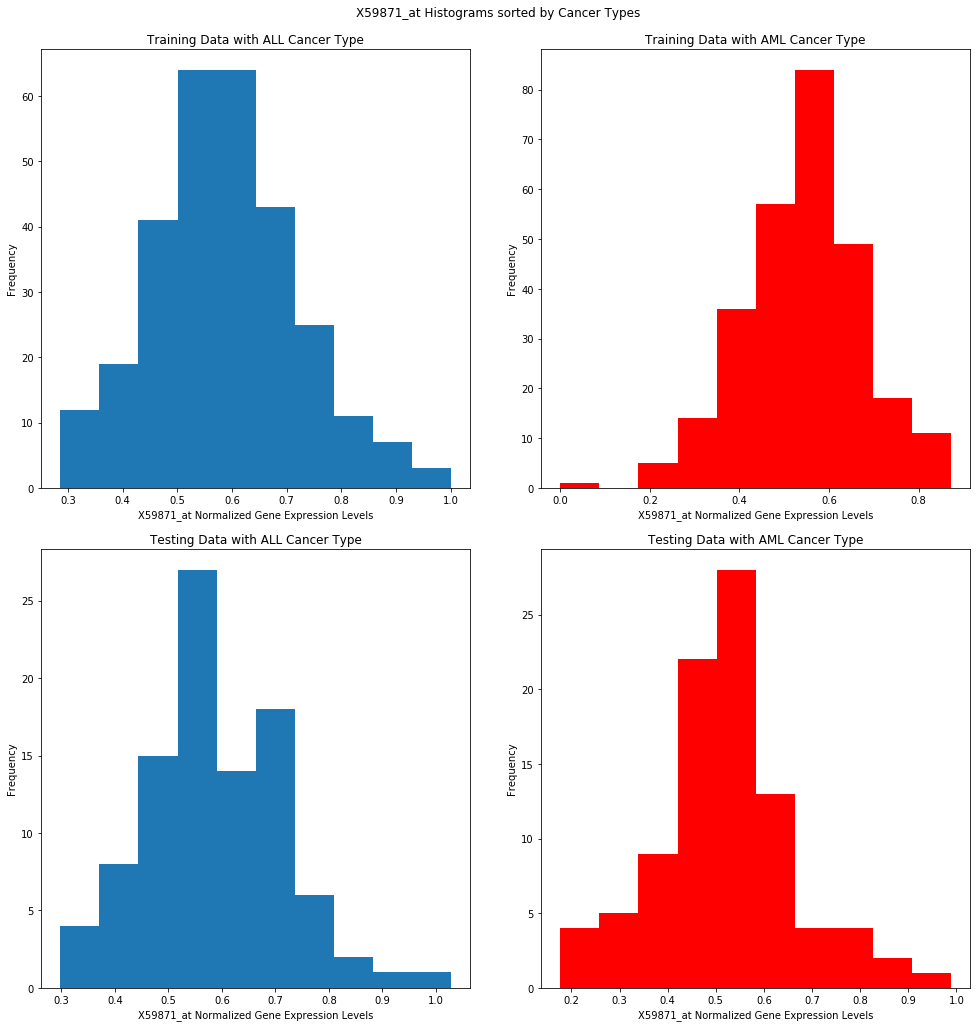

In [10]:
# your code here
fig = plt.figure()
fig, ax = plt.subplots(2,2)
fig.suptitle(best_predictor + " Histograms sorted by Cancer Types")
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout(pad=6,h_pad=4,w_pad=4)

# Per the discussion on Ed, we plot two sets of histograms for training and testing data
# And each set has two histograms, one for ALL Cancer Type, and one for AML Cancer Type
# https://us.edstem.org/courses/2332/discussion/159117

ax[0][0].hist(new_X_train[y_train==0][best_predictor])
ax[0][0].set_title("Training Data with ALL Cancer Type")
ax[0][1].hist(new_X_train[y_train==1][best_predictor],color='r')
ax[0][1].set_title("Training Data with AML Cancer Type")
ax[1][0].hist(new_X_test[y_test==0][best_predictor])
ax[1][0].set_title("Testing Data with ALL Cancer Type")
ax[1][1].hist(new_X_test[y_test==1][best_predictor],color='r')
ax[1][1].set_title("Testing Data with AML Cancer Type")

for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel(best_predictor + " Normalized Gene Expression Levels")
        ax[i][j].set_ylabel("Frequency")

<div class='exercise-r'>  
    
**1.4** Using `best_predictor`, create a classification model by eye-balling a value for this gene that would best discriminate the two cancer classes in the training set. (Note: Do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection.) Justify your choice of value in 1-2 sentences. Report the accuracy of your hand-chosen model on the train and test sets.

In [49]:
# your code here
threshold = 0.5

training_predictions, test_predictions = [],[]

for i in X_train[best_predictor]:
    if i < threshold:
        training_predictions.append(1)
    else:
        training_predictions.append(0)

for i in X_test[best_predictor]:
    if i < threshold:
        test_predictions.append(1)
    else:
        test_predictions.append(0)

train_accuracy = accuracy_score(y_train, training_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy: "+ str(round(train_accuracy, 4)))
print("Test Accuracy: "+ str(round(test_accuracy, 4)))

Train Accuracy: 0.5621
Test Accuracy: 0.5798


*Your answer here*

Looking at the histogram, we desire a threshold where for one cancer type most of the distribution in the histogram are to the left or right and for the other cancer type most of the distribution are to the other side of the threshold. A threshold of 0.5 seems to be a good choice since most of the training set distribution for ALL are to the right of the the threshold and most of the training set distribution for AML are to the left of the threshold.

#### <div class='exercise'><b>Question 2 [25 pts]: Logistic Regression Modeling</b></div>

[▲ Return to contents](#Contents)

**2.1** Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. Calculate and display the training and test classification accuracies of this model. 
How do accuracies compare to the eye-balled ones from 1.4? 

**2.2** Next, fit a multiple logistic regression model with **all** the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values).  
How does the classification accuracy of this model compare with the logistic and eyeballed models above which were fit with a single gene? Be sure to evaluate both the training and test sets.

**2.3** Print out the logistic regression coefficients for  `best_predictor` from the simple logistic and multiple logistic regression models in part 1 and part 2 above.  Interpret the coefficients: Do they agree or disagree?  What does this indicate?

**2.4** Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set. 
Report the chosen best value of the regularization hyperparamter and the classification accuracy on both the training and test sets.

**2.5** Compare the classification accuracies (both train and test) between the un-regularized multiple logistic regression model to the regularized one. Briefly explain why these results occur.

**2.6** How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.2?


## Answers

<div class='exercise-r'>  
 
**2.1** Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. Calculate and display the training and test classification accuracies of this model.
 How do accuracies compare to the eye-balled ones from 1.4?
 
 </div>

In [12]:
# your code here
# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit2_1 = LogisticRegression(penalty='none', max_iter=5000).fit(new_X_train[[best_predictor]],y_train)

# Compute the training and testng accuracy
logit2_1_train_accuracy = logit2_1.score(new_X_train[[best_predictor]],y_train)
logit2_1_test_accuracy = logit2_1.score(new_X_test[[best_predictor]],y_test)

print("Training Classification Accuracy: " + str(round(logit2_1_train_accuracy,4)))
print("Test Classification Accuracy: " + str(round(logit2_1_test_accuracy,4)))

Training Classification Accuracy: 0.5603
Test Classification Accuracy: 0.5904


*Your answer here*

Our classification accuracies are worse on the training set but better on the testing set than the classification accuracies from 1.4, which makes sense since we simply eye-balled our threshold from the training set in 1.4 so we are likely to suffer from more overfitting than the simple logistic regression model above which is why the model in 2.1 performs better on the testing set.

<div class='exercise-r'>  
 
**2.2** Next, fit a multiple logistic regression model with **all** the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values).
 How does the classification accuracy of this model compare with the logistic and eyeballed models above which were fit with a single gene? Be sure to evaluate both the training and test sets.
 
 </div>

In [13]:
# your code here
# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit2_2 = LogisticRegression(penalty='none', max_iter=5000).fit(new_X_train,y_train)

# Compute the training and testng accuracy
logit2_2_train_accuracy = logit2_2.score(new_X_train,y_train)
logit2_2_test_accuracy = logit2_2.score(new_X_test,y_test)

print("Training Classification Accuracy: " + str(round(logit2_2_train_accuracy,4)))
print("Test Classification Accuracy: " + str(round(logit2_2_test_accuracy,4)))

Training Classification Accuracy: 1.0
Test Classification Accuracy: 0.8351


*Your answer here*

After fitting the multiple logistic model with all of the gene predictors we can see a significant increase in the accuracy of our model particulily for the test set.  Our model reports perfect accuracy for the training set which is understandable as we're utilizing all of the data available in the train set to build our model so the model should perfectly predict the train set.  However, our test set prediction accuracy is notibly higher with a 30% jump in accuracy.

<div class='exercise-r'>  
 
**2.3** Print out the logistic regression coefficients for  `best_predictor` from the simple logistic and multiple logistic regression models in part 1 and part 2 above.  Interpret the coefficients: Do they agree or disagree?  What does this indicate?
 
 </div>

In [14]:
# your code here
print(best_predictor + " coefficient from simple logisitic regression model: " + str(round(logit2_1.coef_[0][0],4)))
print(best_predictor + " coefficient from multiple logistic regression model: " + str(round(logit2_2.coef_[0][new_X_train.columns.get_loc(best_predictor)],4)))

X59871_at coefficient from simple logisitic regression model: -2.6323
X59871_at coefficient from multiple logistic regression model: -6.8537


*Your answer here*

Both of the coefficients from our models are in agreement in terms of the sign of the coefficient and it makes sense that they'd both be negative.  The coefficient reported from model 2.2 is significantly more negative than that of 2.1 but this isn't worrying as a more negative coefficient here is likely just the result of a more accurately fit model.

<div class='exercise-r'>  
 
**2.4** Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set.
 Report the chosen best value of the regularization hyperparamter and the classification accuracy on both the training and test sets.
 
 </div>

In [15]:
# your code here

# Per Yuen Ting Chow's response on the Ed post, we leave sklearn's default for regularization hyperparameters
# https://us.edstem.org/courses/2332/discussion/159679

# define the model
logit2_4 = LogisticRegressionCV(cv=5,max_iter=5000,scoring='accuracy',penalty='l1',solver='liblinear')

# fit to the data
logit2_4.fit(new_X_train, y_train)

# Compute the training and testng accuracy
logit2_4_train_accuracy = logit2_4.score(new_X_train,y_train)
logit2_4_test_accuracy = logit2_4.score(new_X_test,y_test)

print("Best Regularization Hyperparameter: " + str(round(logit2_4.C_[0],4)))
print("Training Classification Accuracy: " + str(round(logit2_4_train_accuracy,4)))
print("Test Classification Accuracy: " + str(round(logit2_4_test_accuracy,4)))

Best Regularization Hyperparameter: 0.3594
Training Classification Accuracy: 0.9025
Test Classification Accuracy: 0.8989


<div class='exercise-r'>  
 
**2.5** Compare the classification accuracies (both train and test) between the un-regularized multiple logistic regression model to the regularized one. Briefly explain why these results occur.
 
 </div>

*Your answer here*

The training set accuracy after the regularization is sightly worse than it had been in the previous unregularized model but again the test set prediction accuracy is higher than it had been.  Regularization aims to lower the error on predictive models by hampering the ability for the model to overfit the training data.  By regularizing we are forcing the model to not be perfectly fit to the training set which means a decrease in the training accuracy is expected.  The corresponding increase in accuracy for the test set indicates that the regularization was successful in improving the predictive power of the model on new data.  

<div class='exercise-r'>  
    
**2.6** How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.2?

In [16]:
# your code here
num_important = 0

for i in range(len(new_X_train.columns)):
    if logit2_4.coef_[0][i]!=0:
        num_important = num_important + 1
        
print("Number of important features: " + str(num_important))

Number of important features: 82


*Your answer here*

We found that all of the gene predictors were significant features in the regularized model.  This indicates that the full logistic regression model of question 2.2 likely quite accurate as all predictors were used and have been shown to be significant when predicting new data.  

---

#### <div class='exercise'><b>Question 3 [20 pts]: Performing Principal Components Analysis</b></div>

[▲ Return to contents](#Contents)

**3.1** Create the full PCA decomposition of `X_train` and apply the transformation to both `X_train` and `X_test`.  Report the shape of both of these.  What is the limiting factor for the maximum number of PCA components for this data set? 

**3.2** PCA is often solely used to help in visualizing high-dimensional problems.  Plot the scatterplot of the second PCA vector of train on the $Y$-axis and the first PCA vector of train on the $X$-axis (be sure to denote the classes via different colors and markings).  In 2-3 sentences, explain why using the scatterplot of the top two PCA vectors is a useful approach to visualize a high dimensional classification problem.

**3.3** Determine and report the variance explained in `X_train` based on the top two PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).

**3.4** Plot explained variability in the predictors on the $Y$-axis and the PCA component number on the $X$-axis. Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony.

<hr>


## Answers

<div class='exercise-r'>  
 
**3.1** Create the full PCA decomposition of `X_train` and apply the transformation to both `X_train` and `X_test`.  Report the shape of both of these.  What is the limiting factor for the maximum number of PCA components for this data set?
 
 </div>

In [42]:
# your code here
from sklearn.preprocessing import StandardScaler

# Per this discussion on Ed we will standardize the original data set
# https://us.edstem.org/courses/2332/discussion/157759
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# your code here
# create/fit the 'full' pca transformation
pca = PCA().fit(X_train_scaled,y_train)

# apply the pca transformation to the full predictor set
pcaX_train = pca.transform(X_train_scaled)
pcaX_test = pca.transform(X_test_scaled)

# convert to a data frame
pcaX_df_train = pd.DataFrame(pcaX_train)
pcaX_df_test = pd.DataFrame(pcaX_test)

print("Shape of PCA decomposition for the training set: " + str(pcaX_df_train.shape))
print("Shape of PCA decomposition for the test set: " + str(pcaX_df_test.shape))

Shape of PCA decomposition for the training set: (564, 564)
Shape of PCA decomposition for the test set: (188, 564)


*Your answer here*

For this particular data set the limiting factor for the maximum number of PCA components is chooseing componets that have eigenvalue greater than 1.  There are multiple ways of determinging the maximum number of PCA components but with this particular implementation the eigenvalue >1 (the most standard practice for limiting PCA components) was utilized.

<div class='exercise-r'>  
 
**3.2** PCA is often solely used to help in visualizing high-dimensional problems.  Plot the scatterplot of the second PCA vector of train on the $Y$-axis and the first PCA vector of train on the $X$-axis (be sure to denote the classes via different colors and markings).  In 2-3 sentences, explain why using the scatterplot of the top two PCA vectors is a useful approach to visualize a high dimensional classification problem.
 
 </div>

Text(0, 0.5, 'Second PCA Component Vector')

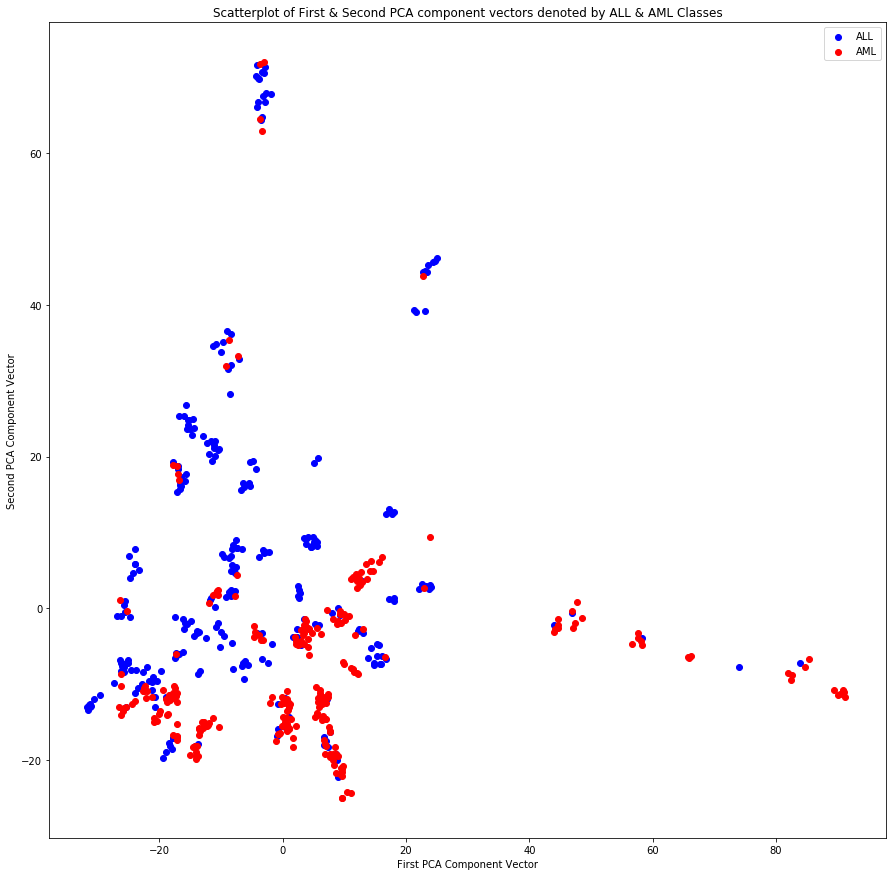

In [19]:
# your code here
plt.figure(figsize=(15,15))
plt.scatter(pcaX_train[:,0][y_train == 0], pcaX_train[:,1][y_train == 0],color='b',label='ALL')
plt.scatter(pcaX_train[:,0][y_train == 1], pcaX_train[:,1][y_train == 1],color='r',label='AML')
plt.legend()
plt.title('Scatterplot of First & Second PCA component vectors denoted by ALL & AML Classes')
plt.xlabel('First PCA Component Vector')
plt.ylabel('Second PCA Component Vector')

*Your answer here*

PCA's main aim is to reduce the dimensionality of our data set so we can better tease out trends.  By utilizing scatter plots on the top two vectors we can more easily see the clustering of the points aswell as when the two vectors begin to diverge from one another.

<div class='exercise-r'>  
 
**3.3** Determine and report the variance explained in `X_train` based on the top two PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).
 
 </div>

In [20]:
# your code here
total_var = sum(np.var(pcaX_df_train))
v1_var = np.var(pcaX_df_train[0])
v2_var = np.var(pcaX_df_train[1])

print("Explained Variance explained by top two vectors: "+ str(round(((v1_var +v2_var)/total_var),4)))

Explained Variance explained by top two vectors: 0.1157


In [21]:
# your code here
num_vectors = 0
current_var = 0
cum_var = 0

for i in range(len(pcaX_df_train.columns)):
    current_var = (np.var(pcaX_df_train[i]))/total_var
    if cum_var < 0.9:
       num_vectors = num_vectors + 1
       cum_var = cum_var + current_var
       current_var = current_var + (np.var(pcaX_df_train[i+1]))/total_var
    
print("Number of Vectors to explain 90% Variance: "+ str(num_vectors))

Number of Vectors to explain 90% Variance: 222


<div class='exercise-r'>  
    
**3.4** Plot explained variability in the predictors on the $Y$-axis and the PCA component number on the $X$-axis. Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony.

<function matplotlib.pyplot.show(*args, **kw)>

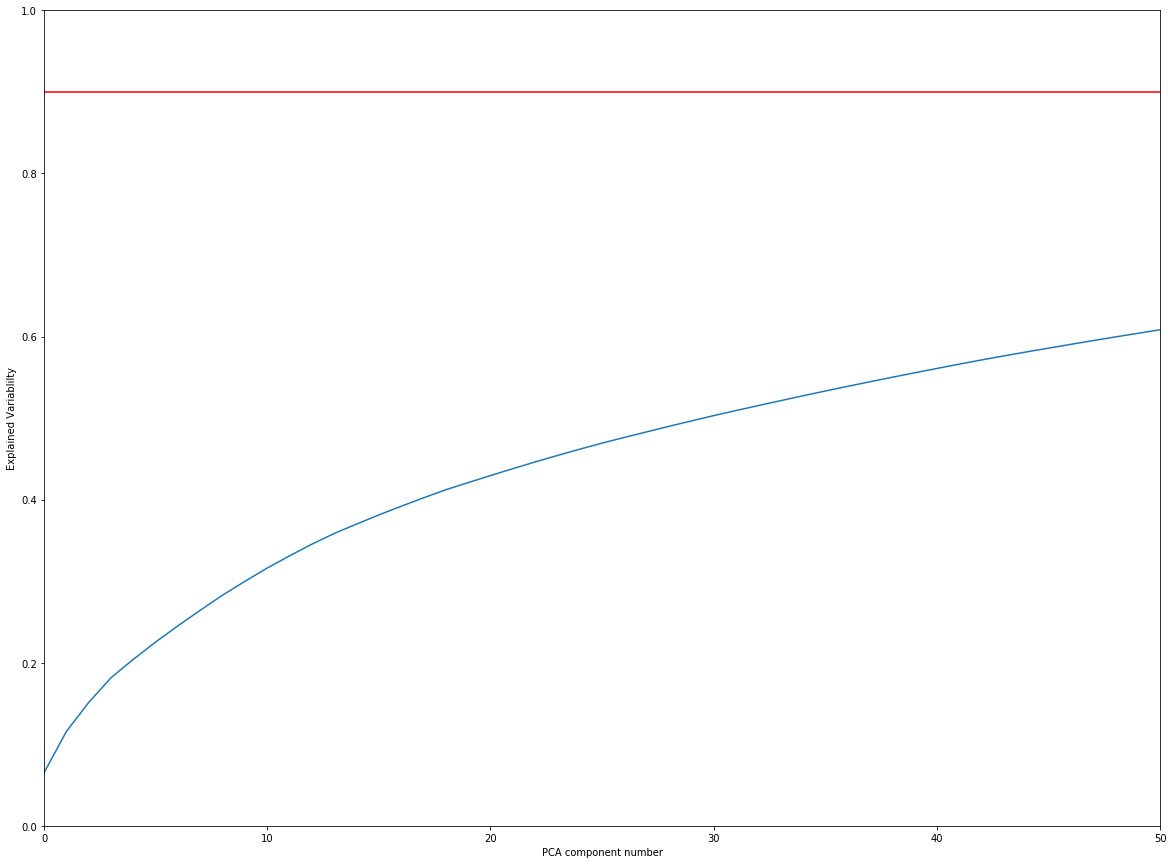

In [37]:
# your code here
explained_vars = []
current = 0
cumulative = 0
num_components = 50

for i in range(num_components+1):
    current = (np.var(pcaX_df_train[i]))/total_var
    if cumulative != 1:
        cumulative = cumulative + current
        explained_vars.append(cumulative)
        current = current + (np.var(pcaX_df_train[i+1]))/total_var
        
plt.figure(figsize=(20,15))
plt.plot(range(num_components+1),explained_vars)
plt.xlim(0,num_components)
plt.ylim(0,1)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel("PCA component number")
plt.ylabel("Explained Variablilty")

plt.show

In [41]:
# your code here
partial_var = sum(np.var(pcaX_df_train[list(range(num_components))]))

print("Explained Variance explained by top " + str(num_components) + " vectors: "+ str(round((partial_var/total_var),4)))

Explained Variance explained by top 50 vectors: 0.604


*Your answer here*

Choosing the top 50 PCA vectors seems to be a good choice since it covers 60\% of total variance in the training set but isn't an excessive number of PCA vectors like the 222 needed to cover 90\% of total variance in the training set. We see from the chart that as we add more PCA vectors, there is diminishing returns on how much total variance is explained by each additional PCA vector.

#### <div class='exercise'><b>Question 4 [10 pts]: Principal Components Regression (PCR)</b></div>

[▲ Return to contents](#Contents)

**4.1** Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first two PCA vectors, (2) with the number of component vectors you chose from problem 3 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with the models fit in Question 2?

**4.2** Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well. 


<hr>


## Answers

<div class='exercise-r'>  
 
**4.1** Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first two PCA vectors, (2) with the number of component vectors you chose from problem 3 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with the models fit in Question 2?
 
 </div>

In [32]:
# your code here
# Select vectors for each model
vectors1 = [0,1]
vectors2 = list(range(num_components))
vectors3 = list(range(num_vectors))

# Create and fit the three Logistic Regression Models
logit4_1_1 = LogisticRegression(penalty='none', max_iter=5000).fit(pcaX_df_train[vectors1],y_train)
logit4_1_2 = LogisticRegression(penalty='none', max_iter=5000).fit(pcaX_df_train[vectors2],y_train)
logit4_1_3 = LogisticRegression(penalty='none', max_iter=5000).fit(pcaX_df_train[vectors3],y_train)

# Compute the training and testing accuracy
logit4_1_1_train_accuracy = logit4_1_1.score(pcaX_df_train[vectors1],y_train)
logit4_1_1_test_accuracy = logit4_1_1.score(pcaX_df_test[vectors1],y_test)
logit4_1_2_train_accuracy = logit4_1_2.score(pcaX_df_train[vectors2],y_train)
logit4_1_2_test_accuracy = logit4_1_2.score(pcaX_df_test[vectors2],y_test)
logit4_1_3_train_accuracy = logit4_1_3.score(pcaX_df_train[vectors3],y_train)
logit4_1_3_test_accuracy = logit4_1_3.score(pcaX_df_test[vectors3],y_test)

print("Training Classification Accuracy for 1st Model with just two PCA Vectors: " + str(round(logit4_1_1_train_accuracy,4)))
print("Test Classification Accuracy for 1st Model with just two PCA Vectors: " + str(round(logit4_1_1_test_accuracy,4)))
print("Training Classification Accuracy for 2nd Model with " + str(num_components) + " PCA Vectors: " + str(round(logit4_1_2_train_accuracy,4)))
print("Test Classification Accuracy for 2nd Model with " + str(num_components) + " PCA Vectors: " + str(round(logit4_1_2_test_accuracy,4)))
print("Training Classification Accuracy for 3rd Model with " + str(num_vectors) + " PCA Vectors: " + str(round(logit4_1_3_train_accuracy,4)))
print("Test Classification Accuracy for 3rd Model with " + str(num_vectors) + " PCA Vectors: " + str(round(logit4_1_3_test_accuracy,4)))

Training Classification Accuracy for 1st Model with just two PCA Vectors: 0.7553
Test Classification Accuracy for 1st Model with just two PCA Vectors: 0.7766
Training Classification Accuracy for 2nd Model with 100 PCA Vectors: 0.9113
Test Classification Accuracy for 2nd Model with 100 PCA Vectors: 0.8564
Training Classification Accuracy for 3rd Model with 222 PCA Vectors: 1.0
Test Classification Accuracy for 3rd Model with 222 PCA Vectors: 0.8032


*Your answer here*

Compaired to our model in 2.2 where our training accuracy was 1 due to massive overfitting the accuracies of all 3 of these models for the training set is either the same or slightly worse. Additionally the test set accuracy for all 3 of these models is still worse than the acccuracy values we obtained from the 2.2 model.  When we compare these new models to the regularized model of 2.4 we see for the most part that the training accuracies reported in the 4.1 models are better,  but again the test set accuracy is worse.  Either way, all of the 4.1 models have both better training and test accuracies when compaired to the 2.1 model.  

<div class='exercise-r'>  
    
**4.2** Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well.

In [33]:
# your code here
# List of vectors and models from above
vectors = [vectors1, vectors2, vectors3]
logits = [logit4_1_1,logit4_1_2,logit4_1_3]

# Empty lists to store training and cross-validation scores
cv_scores = []

for v,l in zip(vectors, logits):
    # Compute the cross-validation scores
    logit_cv_score = cross_val_score(l,pcaX_df_train[v],y_train,cv=5,scoring='accuracy')
    
    cv_scores.append(np.mean(abs(logit_cv_score)))

In [34]:
# your code here
# The best model with the best cross validation score
best_score = max(cv_scores)
best_logit = logits[cv_scores.index(best_score)]
best_vector = vectors[cv_scores.index(best_score)]

print("Best number of principal components from the results of cross-validation on the 3 models is: " + str(len(best_vector)))

Best number of principal components from the results of cross-validation on the 3 models is: 100


#### <div class='exercise'><b>Question 5 [25 pts]: Multi-Class Response</b></div>

[▲ Return to contents](#Contents)

As mentioned earlier, there are actually two subtypes of `ALL` cancer: B-cell and T-cell.  The variable `Cancer_subtype` designates the 3 cancer cubtypes: 
- 0 = ALL Type T, 
- 1 = ALL Type B, and 
- 2 = AML.  
Use this updated response variable to answer the following questions:

**5.1** Fit two separate well-tuned, regularized (Ridge-like), multinomial logistic regression models to predict `Cancer_subtype`. For the first model, use the first two PCA components as predictors. For the second model, include  the quadratic and interaction terms for the first two PCA components, for a total of five predictors. Print and evaluate (with two or three sentences) the classification accuracy of the two models, on both train and test.

**5.2** Create two separate scatter plots (one will be for each model above) of the first two principal components of the test data and denote the three cancer types by different color and marker.  Plot the decision boundaries separately on the two scatterplots and interpret the results:  which model appears to draw more reasonable decision boundaries?  Do the first two principal components appear to provide enough predictive power for this classification problem?

**Hint: you can use the `meshgrid` as seen in lecture exercises to generate the decision boundaries.**

**5.3** Use cross-validation to determine the best number of principal components for this multiclass problem. Consider the set of [2, 5, 10, 15, 20, 50, and 100] components.  Be sure to clearly substantiate your choice.

**5.4** For your best model in the previous part, determine the classification accuracies within each observed (not predicted) subtype in test: which group is the most difficult to classify accurately?  Is this surprising?  Why or why not?

**5.5** In the 2-class problem the classification threshold can be altered from 0.5 to affect the number of false positives and false negatives (this is what the ROC curve is based on). In the multiclass setting, the predicted class probabilities can be weighted to determine the winning class (so that a smaller class will not be 'ignored' by the algorithm): essentially, each class's predicted probability can be multiplied by this class weight and compared to determine the classification.
 
Determine the classification accuracies in each observed subtype in test if instead the observations were weighted more 'fairly': they are inversely weighted based on the observed sample sizes in train (so that if there were just 2 groups in the response with 75% of the response in one class and 25% in the other, the smaller class should be weighted 3 times as much as the larger class).  

Report the weights you used and the resulting classification accuracies in each subtype.  In what way have the results improved?  In what way have the results not improved?  Comment with 2-3 sentences.

<hr>


## Answers

<div class='exercise-r'>  
 
**5.1** Fit two separate well-tuned, regularized (Ridge-like), multinomial logistic regression models to predict `Cancer_subtype`. For the first model, use the first two PCA components as predictors. For the second model, include  the quadratic and interaction terms for the first two PCA components, for a total of five predictors. Print and evaluate (with two or three sentences) the classification accuracy of the two models, on both train and test.
 
 </div>

In [26]:
# your code here
# Create predictor variables
X_train1 = pcaX_train[:,[0,1]]
X_test1 = pcaX_test[:,[0,1]]
X_train2 = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X_train1)
X_test2 = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X_test1)

# Create and fit two multinomial models
mlogit5_1_1 = LogisticRegressionCV(cv=5,penalty='l2', solver='lbfgs', multi_class='multinomial',max_iter = 1000).fit(X_train1, y2_train)
mlogit5_1_2 = LogisticRegressionCV(cv=5,penalty='l2', solver='lbfgs', multi_class='multinomial',max_iter = 1000).fit(X_train2, y2_train)

# Compute the training and testing accuracy
mlogit5_1_1_train_accuracy = mlogit5_1_1.score(X_train1,y2_train)
mlogit5_1_1_test_accuracy = mlogit5_1_1.score(X_test1,y2_test)
mlogit5_1_2_train_accuracy = mlogit5_1_2.score(X_train2,y2_train)
mlogit5_1_2_test_accuracy = mlogit5_1_2.score(X_test2,y2_test)

print("Training Classification Accuracy for 1st Model with first two PCA Vectors: " + str(round(mlogit5_1_1_train_accuracy,4)))
print("Testing Classification Accuracy for 1st Model with first two PCA Vectors: " + str(round(mlogit5_1_1_test_accuracy,4)))
print("Training Classification Accuracy for 2nd Model with five Vectors: " + str(round(mlogit5_1_2_train_accuracy,4)))
print("Testing Classification Accuracy for 2nd Model with five Vectors: " + str(round(mlogit5_1_2_test_accuracy,4)))

Training Classification Accuracy for 1st Model with first two PCA Vectors: 0.6525
Testing Classification Accuracy for 1st Model with first two PCA Vectors: 0.6489
Training Classification Accuracy for 2nd Model with five Vectors: 0.6915
Testing Classification Accuracy for 2nd Model with five Vectors: 0.6968


*Your answer here*

On both the training and testing dataset, our second model that includes quadratic and interaction terms of our first two PCA components perform better on a classification accuracy basis than our first model that only includes the first two PCA components without the quadratic and interaction terms. In fact, for the second model we actually have a higher testing classification accuracy than training classification accuracy, which isn't true of the first model. That suggests that the quadratic and interaction terms are adding signficant predictive power to our model and thus are good predictors to regress on.

<div class='exercise-r'>  
 
**5.2** Create two separate scatter plots (one will be for each model above) of the first two principal components of the test data and denote the three cancer types by different color and marker.  Plot the decision boundaries separately on the two scatterplots and interpret the results:  which model appears to draw more reasonable decision boundaries?  Do the first two principal components appear to provide enough predictive power for this classification problem?
 
 **Hint: you can use the `meshgrid` as seen in lecture exercises to generate the decision boundaries.**
 
 </div>

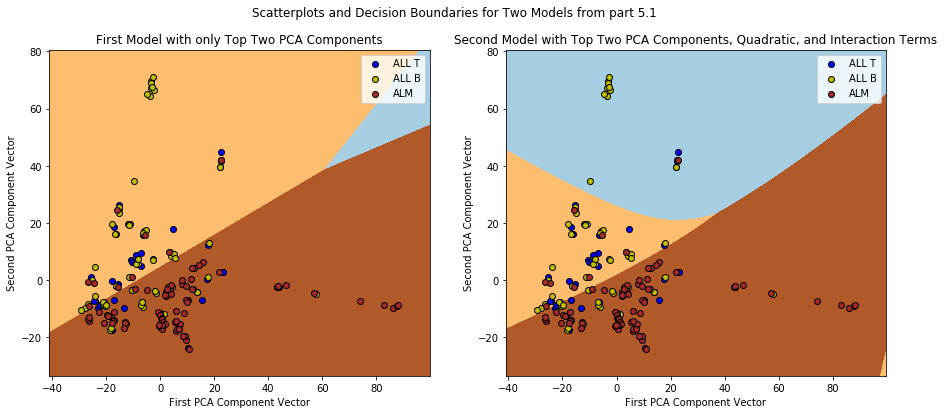

In [75]:
# your code here
# Plot the decision boundary
x1_range = pcaX_test[:,0].max() - pcaX_test[:,0].min()
x2_range = pcaX_test[:,1].max() - pcaX_test[:,1].min()

x1_min, x1_max = pcaX_test[:,0].min()-0.1*x1_range, pcaX_test[:,0].max() +0.1*x1_range
x2_min, x2_max = pcaX_test[:,1].min()-0.1*x2_range, pcaX_test[:,1].max() +0.1*x2_range

step = .05
x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))

x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
y_hat1 = mlogit5_1_1.predict(np.c_[x1x.ravel(), x2x.ravel()])
y_hat2 = mlogit5_1_2.predict(np.c_[x1x.ravel(), x2x.ravel(),
                                   x1x.ravel()**2, x2x.ravel()**2, x1x.ravel()*x2x.ravel()])


fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 6))
fig.suptitle("Scatterplots and Decision Boundaries for Two Models from part 5.1")

ax1.pcolormesh(x1x, x2x, y_hat1.reshape(x1x.shape), cmap=plt.cm.Paired,alpha = 0.5)
ax1.scatter(pcaX_test[:,0][y2_test==0], pcaX_test[:,1][y2_test==0], c='b',
            edgecolors='k', cmap=plt.cm.Paired, label = "ALL T")
ax1.scatter(pcaX_test[:,0][y2_test==1], pcaX_test[:,1][y2_test==1], c='y',
            edgecolors='k', cmap=plt.cm.Paired, label = "ALL B")
ax1.scatter(pcaX_test[:,0][y2_test==2], pcaX_test[:,1][y2_test==2], c="brown",
            edgecolors='k', cmap=plt.cm.Paired, label = "ALM")
ax1.legend()
ax1.set_title("First Model with only Top Two PCA Components")
ax1.set_xlabel("First PCA Component Vector")
ax1.set_ylabel("Second PCA Component Vector")

ax2.pcolormesh(x1x, x2x, y_hat2.reshape(x1x.shape), cmap=plt.cm.Paired,alpha = 0.5)
ax2.scatter(pcaX_test[:,0][y2_test==0], pcaX_test[:,1][y2_test==0], c='b',
            edgecolors='k', cmap=plt.cm.Paired, label = "ALL T")
ax2.scatter(pcaX_test[:,0][y2_test==1], pcaX_test[:,1][y2_test==1], c='y',
            edgecolors='k', cmap=plt.cm.Paired, label = "ALL B")
ax2.scatter(pcaX_test[:,0][y2_test==2], pcaX_test[:,1][y2_test==2], c="brown",
            edgecolors='k', cmap=plt.cm.Paired, label = "ALM")
ax2.legend()
ax2.set_title("Second Model with Top Two PCA Components, Quadratic, and Interaction Terms")
ax2.set_xlabel("First PCA Component Vector")
ax2.set_ylabel("Second PCA Component Vector")


plt.show()

*Your Answer Here*

The first scatter plot appears to draw a more reasonable decision boundry as our second graph appears to be much more visually chaotic.  The first one follows the logical split of the two vectors and better splits the sub-types.  Even with these splits in mind the first two vectors don't appear to provide enough predictive power for this data set.  

<div class='exercise-r'>  
 
**5.3** Use cross-validation to determine the best number of principal components for this multiclass problem. Consider the set of [2, 5, 10, 15, 20, 50, and 100] components.  Be sure to clearly substantiate your choice.
 
 </div>

In [52]:
# your code here
n_components = [2, 5, 10, 15, 20, 50, 100]
# Empty list to hold the CV Scores
cv_scores = []

for n in n_components:
    # Create Model
    logit5_3 = LogisticRegression(penalty='none', multi_class='multinomial',max_iter = 5000)
    # Fit model
    logit5_3.fit(pcaX_df_train[list(range(n))], y2_train)
    
    # Compute the cross-validation scores
    logit5_3_cv_score = cross_val_score(logit5_3,pcaX_df_train[list(range(n))],y_train,cv=5,scoring='accuracy')
    
    cv_scores.append(np.mean(abs(logit5_3_cv_score)))

In [53]:
# your code here
# The best number of componenets with the best cross validation score
best_score = max(cv_scores)
best_components = n_components[cv_scores.index(best_score)]

print("Best number of principal components from the results of cross-validation is: " + str(best_components))

Best number of principal components from the results of cross-validation is: 20


*Your answer here*

Using five-fold cross-validation, we select the number of PCA components that results in the model with the best cross-validation score. It turns out that this model is the one that predicts over the first 20 PCA components.

<div class='exercise-r'>  
 
**5.4** For your best model in the previous part, determine the classification accuracies within each observed (not predicted) subtype in test: which group is the most difficult to classify accurately?  Is this surprising?  Why or why not?
 
 </div>

In [58]:
# your code here
# Reset indices of y2_test to use for indexing
y2_test2 = y2_test.reset_index().drop(labels='index',axis=1)['Cancer_subtype']

# Refit model from 5.3
logit5_3 = LogisticRegression(multi_class='multinomial',max_iter = 1000)
logit5_3.fit(pcaX_df_train[list(range(20))], y2_train)

y_hat = pd.Series(logit5_3.predict(pcaX_df_test[list(range(20))]))

# Compute the testing accuracy for each subtype
logit5_3_subtype0_accuracy = accuracy_score(y2_test2[y2_test2==0],y_hat[y2_test2==0])
logit5_3_subtype1_accuracy = accuracy_score(y2_test2[y2_test2==1],y_hat[y2_test2==1])
logit5_3_subtype2_accuracy = accuracy_score(y2_test2[y2_test2==2],y_hat[y2_test2==2])

print("Test Classification Accuracy for subtype ALL T: " + str(round(logit5_3_subtype0_accuracy,4)))
print("Test Classification Accuracy for subtype ALL B: " + str(round(logit5_3_subtype1_accuracy,4)))
print("Test Classification Accuracy for subtype ALM: " + str(round(logit5_3_subtype2_accuracy,4)))

Test Classification Accuracy for subtype ALL T: 0.3333
Test Classification Accuracy for subtype ALL B: 0.8095
Test Classification Accuracy for subtype ALM: 0.913


*Your answer here*

The subtype group that is most difficult to classify is subtype 0, or the cancer subtype ALL T. This is unsurprising since if we examine our training and our testing dataset, ALL T is signficantly more rare in our observations that the other two cancer subtypes. So our model has difficulty accurately predicting for that subtype because it is so underrepresented in our sample of observations which causes it to be inaccurately classified often on our testing dataset, since the model has little information (from few observations) about ALL T to fit our predictors to accurately predict it.

<div class='exercise-r'>  
 
**5.5** In the 2-class problem the classification threshold can be altered from 0.5 to affect the number of false positives and false negatives (this is what the ROC curve is based on). In the multiclass setting, the predicted class probabilities can be weighted to determine the winning class (so that a smaller class will not be 'ignored' by the algorithm): essentially, each class's predicted probability can be multiplied by this class weight and compared to determine the classification.
 
 Determine the classification accuracies in each observed subtype in test if instead the observations were weighted more 'fairly': they are inversely weighted based on the observed sample sizes in train (so that if there were just 2 groups in the response with 75% of the response in one class and 25% in the other, the smaller class should be weighted 3 times as much as the larger class).
 
 Report the weights you used and the resulting classification accuracies in each subtype.  In what way have the results improved?  In what way have the results not improved?  Comment with 2-3 sentences.
 </div>

In [55]:
# your code here
# Find proportion of Training Set corresponding to each subtype
proportion_subtype0 = len(y2_train[y2_train==0])/len(y2_train)
proportion_subtype1 = len(y2_train[y2_train==1])/len(y2_train)
proportion_subtype2 = len(y2_train[y2_train==2])/len(y2_train)

# Calculate the weights to use for each subtype
weight0 = 1/proportion_subtype0
weight1 = 1/proportion_subtype1
weight2 = 1/proportion_subtype2

probs = logit5_3.predict_proba(pcaX_df_test[list(range(20))])
weighted_probs = np.multiply(probs,[weight0, weight1, weight2])

y_pred = []
for p in weighted_probs:
    y_pred.append(np.argmax(p))

In [59]:
# your code here
y_hat = pd.Series(y_pred)

# Compute the testing accuracy for each subtype
subtype0_accuracy = accuracy_score(y2_test2[y2_test2==0],y_hat[y2_test2==0])
subtype1_accuracy = accuracy_score(y2_test2[y2_test2==1],y_hat[y2_test2==1])
subtype2_accuracy = accuracy_score(y2_test2[y2_test2==2],y_hat[y2_test2==2])

print("Test Classification Accuracy for subtype ALL T: " + str(round(subtype0_accuracy,4)))
print("Test Classification Accuracy for subtype ALL B: " + str(round(subtype1_accuracy,4)))
print("Test Classification Accuracy for subtype ALM: " + str(round(subtype2_accuracy,4)))

Test Classification Accuracy for subtype ALL T: 0.5758
Test Classification Accuracy for subtype ALL B: 0.5873
Test Classification Accuracy for subtype ALM: 0.8587


*Your answer here*

Our results have improved on the testing classification accuracy for cancer subtype ALL T, but has worsened in testing classification accuracy for the other two subtypes: ALL B and ALM. There is asymmetry in this worsening as the classification accuracy has worsened much more for ALL B than ALM. This makes intuitive sense because we are increasing the weighting on ALL T, since it was underrepresented in our observations, which causes it to be predicted more often so its classification accuracy improves while the classification accuracy worsens for the other two cancer subtypes as a trade-off. Perhaps the testing classification accuracy for ALL B worsens more than ALM because ALL B is more related to ALL T than ALM is.